In [1]:
# Importação das bibliotecas 

!pip install pandas
!pip install kaggle
!pip install mitosheet

In [63]:
# KAGGLE DATASET DOWNLOAD

import kaggle
import mitosheet
import pandas as pd
 
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

api.dataset_download_file('ramirobentes/flights-in-brazil',file_name='BrFlights2.csv')

df = pd.read_csv('BrFlights2.csv', encoding = 'latin1')

In [64]:
df.head()

,Voos,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,...,Estado.Origem,Pais.Origem,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino,LongDest,LatDest,LongOrig,LatOrig
0,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T08:58:00Z,2016-01-30T08:58:00Z,2016-01-30T10:35:00Z,2016-01-30T10:35:00Z,Realizado,NaN,Afonso Pena,...,PR,Brasil,Salgado Filho,Porto Alegre,RS,Brasil,-51.175381,-29.993473,-49.172481,-25.532713
1,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-13T12:13:00Z,2016-01-13T12:13:00Z,2016-01-13T21:30:00Z,2016-01-13T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
2,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-29T12:13:00Z,2016-01-29T12:13:00Z,2016-01-29T21:30:00Z,2016-01-29T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
3,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-19T12:13:00Z,2016-01-18T12:03:00Z,2016-01-19T21:30:00Z,2016-01-18T20:41:00Z,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
4,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T12:13:00Z,2016-01-30T12:13:00Z,2016-01-30T21:30:00Z,2016-01-30T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473


In [65]:
# Deleted column LatOrig from df
df.drop(['LatOrig',
         'LongOrig',
         'LatDest',
         'LongDest',
         'Pais.Destino',
         'Estado.Destino',
         'Cidade.Destino',
         'Aeroporto.Destino',
         'Pais.Origem',
         'Estado.Origem',
         'Cidade.Origem',
         'Aeroporto.Origem',
         'Codigo.Justificativa',
        # 'Partida.Prevista',
        # 'Partida.Real',
        # 'Chegada.Prevista',
         'Voos'],
         axis=1, inplace=True)

# Filtered Situacao.Voo in df
df = df[df['Situacao.Voo'] == 'Realizado']

In [66]:
df[:5]

,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo
0,AMERICAN AIRLINES INC,Internacional,2016-01-30T08:58:00Z,2016-01-30T08:58:00Z,2016-01-30T10:35:00Z,2016-01-30T10:35:00Z,Realizado
1,AMERICAN AIRLINES INC,Internacional,2016-01-13T12:13:00Z,2016-01-13T12:13:00Z,2016-01-13T21:30:00Z,2016-01-13T21:30:00Z,Realizado
2,AMERICAN AIRLINES INC,Internacional,2016-01-29T12:13:00Z,2016-01-29T12:13:00Z,2016-01-29T21:30:00Z,2016-01-29T21:30:00Z,Realizado
3,AMERICAN AIRLINES INC,Internacional,2016-01-19T12:13:00Z,2016-01-18T12:03:00Z,2016-01-19T21:30:00Z,2016-01-18T20:41:00Z,Realizado
4,AMERICAN AIRLINES INC,Internacional,2016-01-30T12:13:00Z,2016-01-30T12:13:00Z,2016-01-30T21:30:00Z,2016-01-30T21:30:00Z,Realizado


In [91]:
Data = pd.to_datetime(df['Chegada.Real']).dt.date
Ano = pd.to_datetime(df['Chegada.Real']).dt.year
Mes = pd.to_datetime(df['Chegada.Real']).dt.month

# df.rename(columns={"A": "a", "B": "c"},axis='columns')
df1 = pd.DataFrame({'Companhia.Aerea': df['Companhia.Aerea'],'Codigo.Tipo.Linha': df['Codigo.Tipo.Linha'], 'Data.Completa': Data, 'Ano': Ano, 'Mes': Mes})
df1.head()

,Companhia.Aerea,Codigo.Tipo.Linha,Data.Completa,Ano,Mes
0,AMERICAN AIRLINES INC,Internacional,2016-01-30,2016,1
1,AMERICAN AIRLINES INC,Internacional,2016-01-13,2016,1
2,AMERICAN AIRLINES INC,Internacional,2016-01-29,2016,1
3,AMERICAN AIRLINES INC,Internacional,2016-01-18,2016,1
4,AMERICAN AIRLINES INC,Internacional,2016-01-30,2016,1


In [92]:
print(df1['Mes'][95404])

2


In [93]:
df1['Companhia.Aerea'].unique()

array(['AMERICAN AIRLINES INC', 'AIR CANADA', 'AIR EUROPA S/A',
       'AIR FRANCE', 'AIRES - LAN COLOMBIA', 'AEROLINEAS ARGENTINAS',
       'AUSTRAL LINEAS A\x90REAS CIELOS DEL SUR S.A', 'AVIANCA',
       'ALITALIA', 'AZUL', 'BRITISH AIRWAYS PLC', 'BOLIVIANA DE AVIACION',
       'AIR CHINA', 'CONDOR FLUGDINST',
       'COPA -COMPANIA PANAMENA DE AVIACION', 'DELTA AIRLINES',
       'LUFTHANSA', 'LAN ARGENTINA S/A', 'TAAG LINHAS AEREAS DE ANGOLA',
       'ETIHAD', 'ETHIOPIAN', 'GOL', 'IBERIA', 'INSELAIR', 'MERIDIANA',
       'KOREAN AIRLINES', 'KLM ROYAL DUTCH AIRLINES', 'LAN CHILE',
       'TAM TRANSP. AR. DEL. MERCOS', 'LAN PERU S/A', 'AVIANCA BRASIL',
       'MAP LINHAS AEREAS', 'PASSAREDO', 'QATAR AIRWAYS',
       'ROYAL AIR MAROC', 'SOUTH µFRICAN AIRWAYS', 'SINGAPORE AIRLINES',
       'SURINAM AIRWAYS', 'SWISSAIR', 'NAO INFORMADO', 'TAM',
       'TAP AIR PORTUGAL',
       'EMPRESA DE TRANSPORTES AEREOS DE CABO VERDE S.A.',
       'TURKISH AIRLINES INC.', 'TRASAMERICA  AIRLINES-TACA

In [94]:
df1['Codigo.Tipo.Linha'].value_counts()

Nacional         1607202
Regional          339077
Internacional     307044
Name: Codigo.Tipo.Linha, dtype: int64

In [95]:
# df1['Mes'] = df1['Mes'].map(lambda x: str(x)[:-2])
# df1['Ano'] = df1['Ano'].map(lambda x: str(x)[:-2])

df1 = df1.loc[df1['Mes'] == 3]
df1.drop(['Data.Completa'], axis=1, inplace=True)

df1[:5]

,Companhia.Aerea,Codigo.Tipo.Linha,Ano,Mes
90745,AMERICAN AIRLINES INC,Internacional,2016,3
90774,AMERICAN AIRLINES INC,Internacional,2016,3
90788,AMERICAN AIRLINES INC,Internacional,2016,3
90822,AMERICAN AIRLINES INC,Internacional,2016,3
90876,AMERICAN AIRLINES INC,Internacional,2016,3


In [96]:
df1['Codigo.Tipo.Linha'].value_counts()

Nacional         157978
Regional          34336
Internacional     29348
Name: Codigo.Tipo.Linha, dtype: int64

In [26]:
df1['Codigo.Tipo.Linha'].value_counts()

Nacional         1780319
Regional          441240
Internacional     320960
Name: Codigo.Tipo.Linha, dtype: int64

In [97]:
df1['Ano'].value_counts()

2015    80407
2017    72019
2016    69236
Name: Ano, dtype: int64

In [98]:
df1['Companhia.Aerea'].value_counts()

AZUL                                                66049
GOL                                                 61537
TAM                                                 49850
AVIANCA BRASIL                                      17245
PASSAREDO                                            5664
AMERICAN AIRLINES INC                                2145
COPA -COMPANIA PANAMENA DE AVIACION                  2004
AEROLINEAS ARGENTINAS                                1576
TAP AIR PORTUGAL                                     1550
MAP LINHAS AEREAS                                    1248
LAN CHILE                                             931
DELTA AIRLINES                                        898
UNITED AIRLINES                                       872
AUSTRAL LINEAS AREAS CIELOS DEL SUR S.A              786
AIR FRANCE                                            602
AVIANCA                                               556
TRASAMERICA  AIRLINES-TACAPERU                        553
SETE          

In [99]:
values = df1.value_counts().keys().tolist()
counts = df1.value_counts().tolist()

print(values[:5])

print(len(values))

print(counts[:5])

print(len(counts))

[('GOL', 'Nacional', 2015, 3), ('AZUL', 'Nacional', 2016, 3), ('AZUL', 'Nacional', 2017, 3), ('GOL', 'Nacional', 2016, 3), ('AZUL', 'Nacional', 2015, 3)]
169
[21340, 18968, 18440, 16748, 15972]
169


In [100]:
flights_df = pd.DataFrame(values,columns = ['Companhia.Aerea','Codigo.Tipo.Linha','Ano','Mes'])

flights_df.insert(4, 'Quantidade', counts, True)

flights_df.drop('Mes', axis=1, inplace=True)

flights_df.groupby(['Companhia.Aerea'])

# flights_df = flights_df.sort_values('Ano', ascending=True)

# flights_df.groupby(['Companhia.Aerea','Ano','Quantidade'])

flights_df

# counts.to_excel('company_flights.xlsx', index=False)

,Companhia.Aerea,Codigo.Tipo.Linha,Ano,Quantidade
0,GOL,Nacional,2015,21340
1,AZUL,Nacional,2016,18968
2,AZUL,Nacional,2017,18440
3,GOL,Nacional,2016,16748
4,AZUL,Nacional,2015,15972
...,...,...,...,...
164,MERIDIANA,Internacional,2016,14
165,AVIANCA BRASIL,Internacional,2016,13
166,AVIANCA BRASIL,Internacional,2015,9
167,EMPRESA DE TRANSPORTES AEREOS DE CABO VERDE S.A.,Internacional,2015,8


In [101]:
# df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})

grouped = flights_df.groupby(['Companhia.Aerea'])

values = flights_df.value_counts().keys().tolist()
counts = flights_df.value_counts().tolist()

df_final = pd.DataFrame(values,columns = ['Companhia.Aerea','Codigo.Tipo.Linha','Ano','Quantidade.total'])
#final_df.to_excel('Base_Voos.xlsx',index=False)

df_final

,Companhia.Aerea,Codigo.Tipo.Linha,Ano,Quantidade.total
0,AEROLINEAS ARGENTINAS,Internacional,2015,352
1,NAO INFORMADO,Internacional,2016,38
2,MAP LINHAS AEREAS,Nacional,2016,55
3,MAP LINHAS AEREAS,Nacional,2017,261
4,MAP LINHAS AEREAS,Regional,2015,401
...,...,...,...,...
164,COPA -COMPANIA PANAMENA DE AVIACION,Internacional,2017,667
165,DELTA AIRLINES,Internacional,2015,364
166,DELTA AIRLINES,Internacional,2016,262
167,DELTA AIRLINES,Internacional,2017,272


In [102]:
def calcula_preju_unitário():
    # CÁLCULO DO PREJUIZO UNITÁRIO COM BASE NO TICKET MÉDIO (ANAC) E PORCENTAGEM DE VOOS ATIVOS (PUC-RIO) - df_final
    Prejuizo_unit = []
    for i in range(len(df_final)):
        if df_final['Codigo.Tipo.Linha'][i] == 'Regional':
            Preju = round(((df_final['Quantidade.total'][i]*425) - 0.05*(df_final['Quantidade.total'][i]*450))*210)
        elif df_final['Codigo.Tipo.Linha'][i] == 'Nacional':
            Preju = round(((df_final['Quantidade.total'][i]*750) - 0.05*(df_final['Quantidade.total'][i]*750))*210)
        else:
            Preju = round(((df_final['Quantidade.total'][i]*3250) - 0.05*(df_final['Quantidade.total'][i]*3250))*210)
        Prejuizo_unit.append(Preju)
    df_final.insert(4, 'Prejuizo.anual', Prejuizo_unit, True)
    df_final.sort_values(['Ano','Quantidade.total'],ascending=True,ignore_index=True).groupby('Companhia.Aerea')
    return df_final

calcula_preju_unitário()

df_final

,Companhia.Aerea,Codigo.Tipo.Linha,Ano,Quantidade.total,Prejuizo.anual
0,AEROLINEAS ARGENTINAS,Internacional,2015,352,228228000
1,NAO INFORMADO,Internacional,2016,38,24638250
2,MAP LINHAS AEREAS,Nacional,2016,55,8229375
3,MAP LINHAS AEREAS,Nacional,2017,261,39052125
4,MAP LINHAS AEREAS,Regional,2015,401,33894525
...,...,...,...,...,...
164,COPA -COMPANIA PANAMENA DE AVIACION,Internacional,2017,667,432466125
165,DELTA AIRLINES,Internacional,2015,364,236008500
166,DELTA AIRLINES,Internacional,2016,262,169874250
167,DELTA AIRLINES,Internacional,2017,272,176358000


In [103]:
df_final.to_excel('Prejuizo_Setor_Aereo.xlsx', index=False)

In [140]:
import warnings
warnings.filterwarnings("ignore")

Empresas = df_final['Companhia.Aerea'].unique().tolist()

df_prejuizos = pd.DataFrame({'Empresa':[],'Prejuizo.medio':[],'Quantidade.total':[]})

for i in range(len(Empresas)):
    Valores = []
    Quantidade = []
    for j in range(len(df_final)):
        if Empresas[i] == df_final['Companhia.Aerea'][j]:
            Anual = df_final['Prejuizo.anual'][j]
            Valores.append(Anual)
            Qtd = df_final['Quantidade.total'][j]
            Quantidade.append(Qtd)
    Media = round((sum(Valores)/len(Valores)))
    Quantidade = sum(Quantidade)
    line = {'Empresa': Empresas[i],'Prejuizo.medio': int(Media),'Quantidade.total': int(Quantidade)}
    df_prejuizos = df_prejuizos.append(line, ignore_index = True).sort_values('Prejuizo.medio', ascending = False)

df_prejuizos[:6]

,Empresa,Prejuizo.medio,Quantidade.total
0,GOL,1.169097e+09,61537.0
1,TAM,1.093077e+09,49850.0
2,AZUL,1.044955e+09,66049.0
3,AMERICAN AIRLINES INC,4.635881e+08,2145.0
4,COPA -COMPANIA PANAMENA DE AVIACION,4.331145e+08,2004.0
5,AVIANCA BRASIL,4.325409e+08,17245.0


In [108]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(df_prejuizos, x='Empresa', y='Prejuizo.medio', color='Prejuizo.medio')
fig.update_layout(autosize = True,
    title='Empresa, Prejuizo.medio bar chart', 
    xaxis = dict(
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF', 
    showlegend=True
)
fig.show(renderer="iframe")

In [151]:
df_chart = df_prejuizos.copy()
df_chart['Prejuizo.medio'] = df_chart['Prejuizo.medio'].apply(lambda x: x/1000000000)
df_chart.head()

,Empresa,Prejuizo.medio,Quantidade.total
0,GOL,1.169097,61537.0
1,TAM,1.093077,49850.0
2,AZUL,1.044955,66049.0
3,AMERICAN AIRLINES INC,0.463588,2145.0
4,COPA -COMPANIA PANAMENA DE AVIACION,0.433115,2004.0


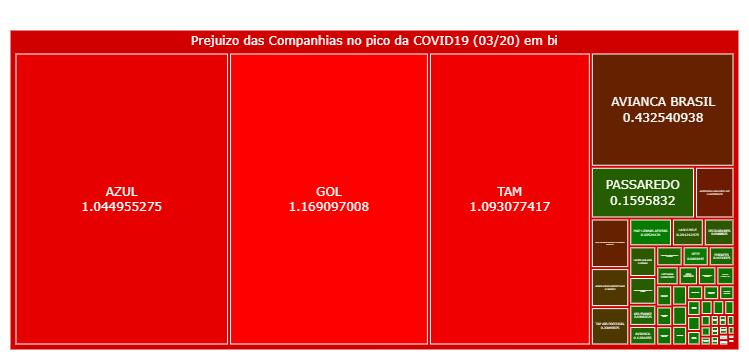

In [154]:
df_chart.sort_values(by=['Empresa'],inplace=True)

fig = px.treemap(df_chart, 
                 path=[px.Constant('Prejuizo das Companhias no pico da COVID19 (03/20) em bi'), 'Empresa'],
                 values='Quantidade.total', color='Prejuizo.medio',
                 color_continuous_scale=[ 'Green', "#8b0000", 'Red'])

fig.data[0].customdata = df_chart['Prejuizo.medio']
fig.data[0].texttemplate = "%{label}<br>%{customdata}"
fig.update_traces(textposition="middle center", 
                  selector=dict(type='treemap'))

fig.update_layout(margin = dict(t=30, l=10, r=10, b=10))
fig.update(layout_coloraxis_showscale=False)
fig.show()